<a href="https://colab.research.google.com/github/ajit2704/Practical-Reinforcement-Learning-With-Colab/blob/master/gym_into.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install gym

In [0]:
!apt-get install python-opengl -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 1s (679 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 110377 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...


In [0]:
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxmuu1 xauth
The following NEW packages will be installed:
  libxmuu1 xauth xvfb
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 818 kB of archives.
After this operation, 2,374 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxmuu1 amd64 2:1.1.2-2 [9,674 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 xauth amd64 1:1.0.10-1 [24.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.2 [783 kB]
Fetched 818 kB in 1s (942 kB/s)
Selecting previously unselected package libxmuu1:amd64.
(Reading database ... 112732 files and directories currently installed.)
Preparing to unpack .../libxmuu1_2%3a1.1.2-2_amd64.deb ...
Unpacking libxmuu1:amd64 (2:1.1.2-2) ...
Selecting previously unselected package xauth.
Pr

In [0]:
!pip install pyvirtualdisplay

  Running setup.py bdist_wheel for pyvirtualdisplay ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/d1/8c/16/1c64227974ae29c687e4cc30fd691d5c0fd40f54446dde99da
  Running setup.py bdist_wheel for EasyProcess ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/b4/c6/e3/c163b04029d8fccfd54b809802640c1af587a01be8d7a04e1a
Successfully built pyvirtualdisplay EasyProcess


In [0]:
!pip install piglet

    100% |████████████████████████████████| 61kB 3.0MB/s 
    100% |████████████████████████████████| 92kB 7.9MB/s 
  Running setup.py bdist_wheel for piglet ... - \ done
  Stored in directory: /root/.cache/pip/wheels/c7/59/a5/5bd1a35a4a4596714c4c7925a1751e7b1580b6ced363fd7969
Successfully built piglet


In [0]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1


**OpenAI Gym**

We're gonna spend several next weeks learning algorithms that solve decision processes. We are then in need of some interesting decision problems to test our algorithms.

That's where OpenAI gym comes into play. It's a python library that wraps many classical decision problems including robot control, videogames and board games.

So here's how it works:


/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Observation space: Box(2,)
Action space: Discrete(3)


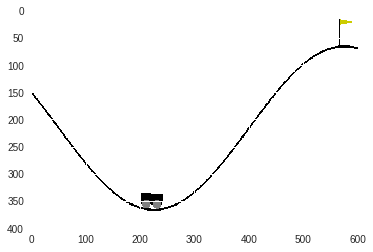

In [0]:
import gym
env = gym.make("MountainCar-v0")

plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

reset() - reset environment to initial state, return first observation

render() - show current environment state (a more colorful version :) )

step(a) - commit action a and return (new observation, reward, is done, info)


In [0]:
obs0 = env.reset()
print("initial observation code:", obs0)

# Note: in MountainCar, observation is just two numbers: car position and velocity

initial observation code: [-0.50948977  0.        ]


In [0]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# Note: as you can see, the car has moved to the riht slightly (around 0.0005)

taking action 2 (right)
new observation code: [-0.50859556  0.00089421]
reward: -1.0
is game over?: False


# Time to play

Try tweaking t or action strategy

**Remember**: Target is to reach to flag

In [0]:

# create env manually to set time limit. Please don't change this.
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(gym.envs.classic_control.MountainCarEnv(),
                             max_episode_steps=TIME_LIMIT + 1)
s = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

# prepare "display"
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

def policy(t):
    if t>50 and t<100:
        return actions['left']
    else:
        return actions['right']


for t in range(TIME_LIMIT):
    
    # change the line below to reach the flag
    s, r, done, _ = env.step(policy(t))
    
    #draw game image on display
    ax.clear()
    ax.imshow(env.render('rgb_array'))
    fig.canvas.draw()
    
    if done:
        print("Well done!")
        break
else:    
    print("Time limit exceeded. Try again.")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


<IPython.core.display.Javascript object>

Well done!


<IPython.core.display.Javascript object>